In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import torch

import mbrl.planning as planning

%load_ext autoreload
%autoreload 2

%matplotlib inline
mpl.rcParams['figure.facecolor'] = 'white'

In [2]:
def rosenbrock_fn(x_array, a=1., b=100.):
    n, d = x_array.shape
    assert d % 2 == 0
    val = 0
    for i in range(d // 2):
        x = x_array[:, 2 * i]
        y = x_array[:, 2 * i + 1]
        val += (a - x) ** 2 + b * (y - (x ** 2)) ** 2
    return -val

Best x: tensor([0.8753, 0.7633]), with value: tensor([-0.0164])


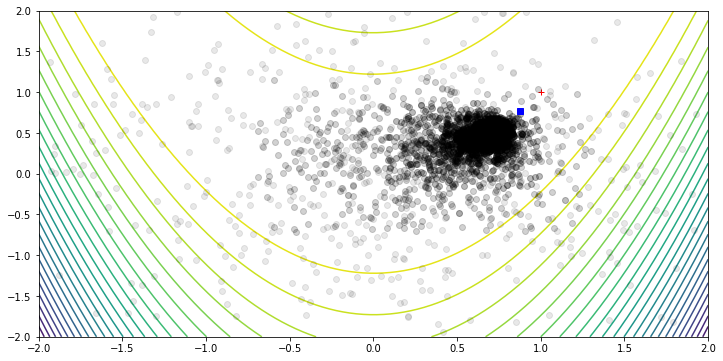

In [3]:
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(111)

lb = [-2., -2.]
ub = [2., 2.]
n = 100
x1 = np.linspace(lb[0], ub[0], n) 
x2 = np.linspace(lb[1], ub[1], n)
x1s, x2s = np.meshgrid(x1, x2)
x = np.stack([x1s.flatten(), x2s.flatten()]).transpose()
z = rosenbrock_fn(x)
z = z.reshape((n, n))

ax.contour(x1s, x2s, z, levels=30)
ax.plot(1, 1, 'r+', markersize=6)

iters = 10
def plot_population(population, it):
    ax.plot(population[::2, 0], population[::2, 1], 'ok', alpha=(it + 1) / (iters + 1))

cem = planning.CEMOptimizer(iters, 0.05, 1000, lb, ub, 0.1, torch.device("cpu"))
best, history = cem.optimize(rosenbrock_fn, (2,), callback=plot_population)
best_value = rosenbrock_fn(best.reshape((1, -1)))
print(f"Best x: {best}, with value: {best_value}")
plt.plot(best[0], best[1], 'bs')
plt.show()

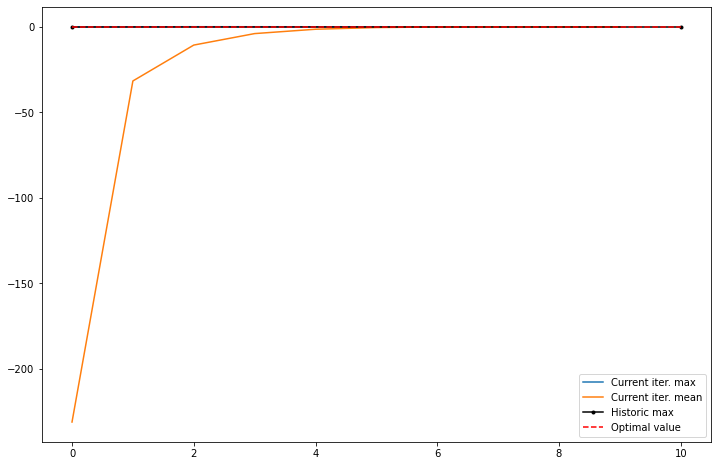

In [4]:
plt.figure(figsize=(12, 8))
plt.plot(history["value_maxs"])
plt.plot(history["value_means"])
plt.plot([0, iters], [best_value, best_value], 'k.-')
plt.plot([0, iters], [0, 0], 'r--')
plt.legend(["Current iter. max", "Current iter. mean", "Historic max", "Optimal value"])
plt.show()